This was a homework assignment to create a linear model predicting the progression of an individual case of diabetes after one year, guided by the specific instructions below: 

Assignment 2, Part 1: Data Exploration. Load the scikit-learn diabetes bunch
object into a variable. Print out the description of the dataset. Load the diabetes
features into a pandas dataframe with the proper column names. Add the target
variable to this same dataframe. Run a command to look at the data types of
your dataframe to see if there is any missing data. Perform descriptive statistics
on the numeric columns of your dataframe. Plot histograms of your data to get a
feel for each column’s distribution. Split your dataframe into a training and test
set with 20% of your data being in the test set. Define a correlation matrix. Look
at values highly correlated with the target. Plot the correlation matrix with a
Seaborn heatmap. Use a Seaborn pairplot to look at the scatter plots of the three
values with the highest target correlation. Prepare a feature set by dropping the
target from your training dataframe. Copy your training target into a new
dataframe.
● Assignment 2, Part 2: Model Training. Train a linear regression model using
your training set. Print the RMSE of your regression model on your training set.
Implement a cross_val_score on a decision tree regressor on your training set.
Print out root mean and standard deviation of the cross-validation scores. Do the
same for a RandomForestRegressor. Record which model performs better.
● Assignment 2, Part 3: Model Tuning. Print out the parameters of your random
forest model. Do a grid search cross-validation with the following values:
n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the following
experiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4. Print
out the best parameters and the best performing model based on this grid
search. Using the cv_results dictionary, print out the rmse of each feature
combination for comparison. Also print out the feature importances of the best
performing grid search model. Describe how it compares with the correlation
matrix we implemented earlier.
● Assignment 2, Part 4: Model Evaluation. Document the best-performing model
between Assignments 2 and 3, and evaluate against your test set. Save your
model for future use.

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, \
  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# Loading in data
X = load_diabetes(as_frame=True).data
y = load_diabetes(as_frame=True).target

df = pd.concat([X,y],axis=1)

In [3]:
'''
Except for the target, data appears to be mean-centered and scaled.

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level'''


# Displaying data
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


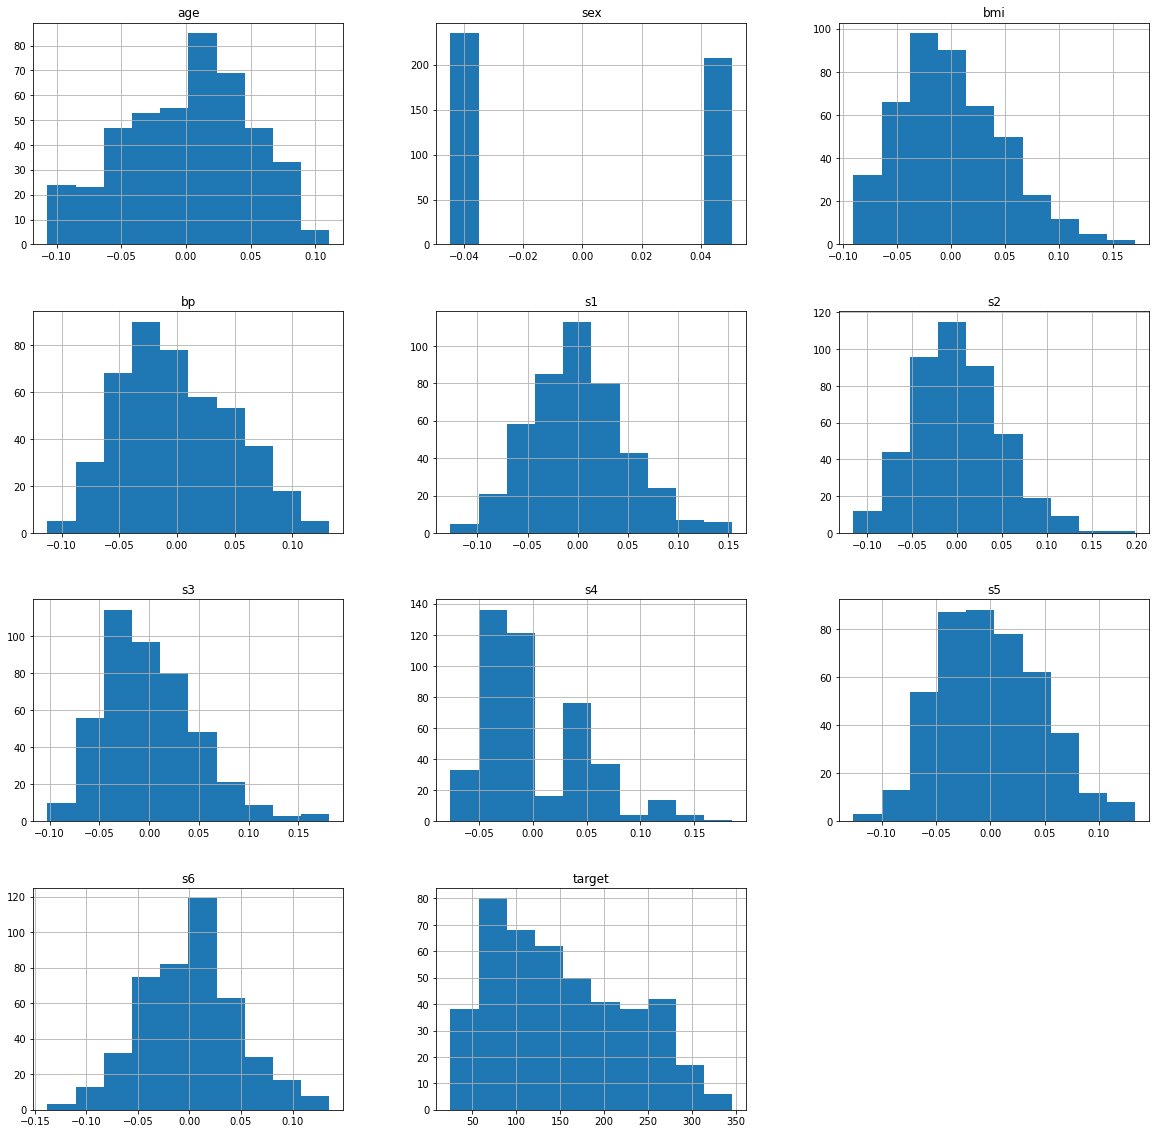

In [5]:
# Histogram to see data distribution
df.hist(figsize=(20, 20));

In [6]:
# train test split 80/20%
train, test = train_test_split(df, test_size=0.2)

<AxesSubplot:>

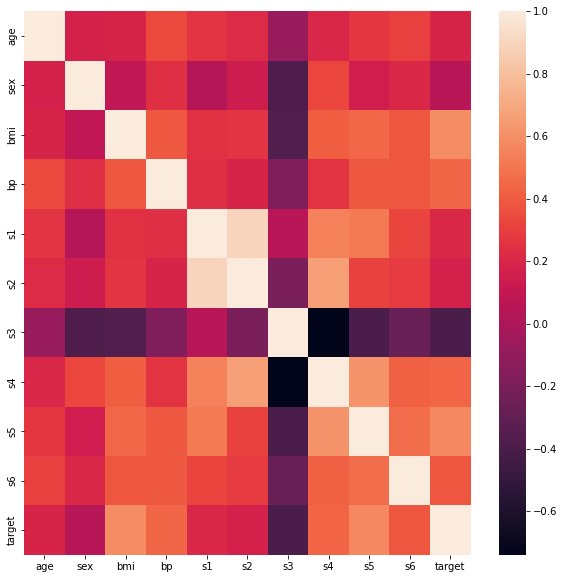

In [7]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr)

Heat map shows strong correlation between the target and bmi, bp, and s5

In [8]:
df.corrwith(df['target']).nlargest(4)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441484
dtype: float64

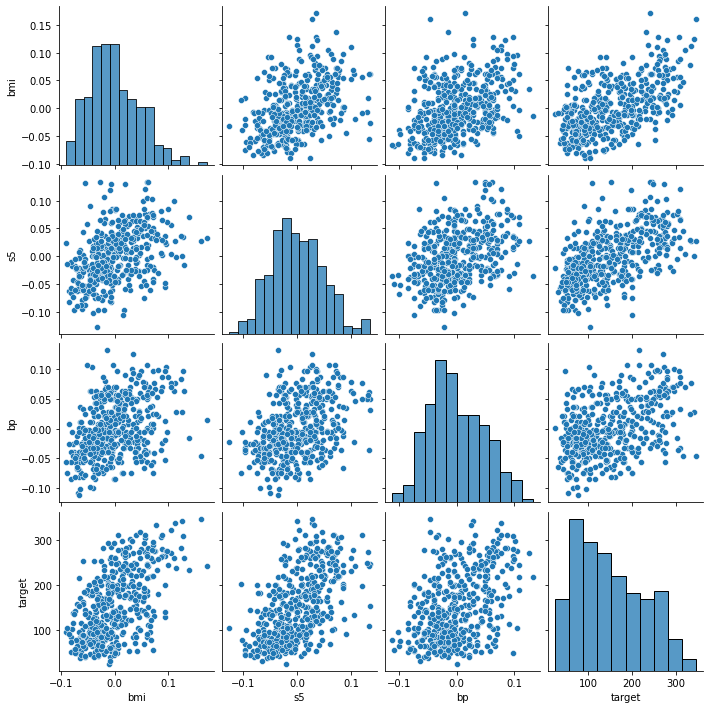

In [9]:
sub = df[['bmi','s5','bp','target']]
sns.pairplot(sub);

Pairplots demonstrate the mostly linear relationship between the target variable and the highly correlated variables

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
  test_size = 0.2, random_state = 51)

In [11]:
# Linear Model
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'RMSE = {rmse:.2f}') #54.18

RMSE = 54.18


In [12]:
# Decision Tree Model
DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_train, y_train)
print("CROSS VAL SCORES FOLLOW:")
DTscores = cross_val_score(DT_reg, X_train, y_train, \
  scoring="neg_mean_squared_error", cv=10)  
DTresults = np.sqrt(-DTscores)
print(f'DT RMSE is {DTresults.mean():.4f}% with std={DTresults.std():.4f}') 

CROSS VAL SCORES FOLLOW:
DT RMSE is 77.7663% with std=5.1492


In [13]:
# Random Forest Model
RF_reg = RandomForestRegressor()
RF_reg.fit(X_train, y_train)
RFscores = cross_val_score(RF_reg, X_train, y_train, \
  scoring="neg_mean_squared_error", cv=10)
RFresults = np.sqrt(-RFscores)
print(f'RF RMSE is {RFresults.mean():.4f}% with std={RFresults.std():.4f}') 
print("RF outperforms DT")

RF RMSE is 58.0340% with std=5.0564
RF outperforms DT


In [14]:
# Random Forest Parameters
print(RF_reg.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [15]:
# Grid search cross-validation for swankier parameters
param_grid = [ {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
                {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4],} ]
RF_reg2 = RandomForestRegressor()
grid_search = GridSearchCV(RF_reg2, param_grid, cv=5, scoring="neg_mean_squared_error", \
  return_train_score=True)
grid_search.fit(X_train, y_train)
print('Best params: ')
print(grid_search.best_params_)
print()
print('Best estimator: ')
print(grid_search.best_estimator_)
print()
cvres = grid_search.cv_results_
print('RMSE per parameter combination: ')
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)
print()

Best params: 
{'max_features': 4, 'n_estimators': 30}

Best estimator: 
RandomForestRegressor(max_features=4, n_estimators=30)

RMSE per parameter combination: 
67.40075215133444 {'max_features': 2, 'n_estimators': 3}
59.59294738024617 {'max_features': 2, 'n_estimators': 10}
58.93654417053929 {'max_features': 2, 'n_estimators': 30}
67.66617378972255 {'max_features': 4, 'n_estimators': 3}
60.88630748398367 {'max_features': 4, 'n_estimators': 10}
57.28941544492329 {'max_features': 4, 'n_estimators': 30}
63.649025019011724 {'max_features': 6, 'n_estimators': 3}
61.037612357742205 {'max_features': 6, 'n_estimators': 10}
58.19247450007399 {'max_features': 6, 'n_estimators': 30}
66.31269802285212 {'max_features': 8, 'n_estimators': 3}
61.22389226687434 {'max_features': 8, 'n_estimators': 10}
57.45779485718376 {'max_features': 8, 'n_estimators': 30}
63.578197018712586 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
61.68123948353625 {'bootstrap': False, 'max_features': 2, 'n_estima

In [16]:
final_model = grid_search.best_estimator_
y_FM_pred = final_model.predict(X_test)
rmse_FM = np.sqrt(mean_squared_error(y_test, y_FM_pred))
print(f'Final Model RMSE = {rmse_FM:.2f}')
print(final_model.get_params())

Final Model RMSE = 56.15
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 4, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [17]:
print('Feature importances: ')
feature_importances = grid_search.best_estimator_.feature_importances_
#print(feature_importances)
for i in range(len(feature_importances)):
    print(f'{feature_importances[i]:.4f} {X.columns[i]}')

Feature importances: 
0.0540 age
0.0135 sex
0.2910 bmi
0.1000 bp
0.0467 s1
0.0590 s2
0.0882 s3
0.0483 s4
0.2179 s5
0.0814 s6


After re-running the code a few times, both models seem to end up landing on 2 features with 30 estimators most often The two most important features are selected to be body-mass index and blood pressure. This excludes s5, which was highly correlated to the target variable, presumably because s5 is also highly correlated with bmi and moderately highly with bp, making it less influential as an individual predictor.

In [18]:
X_train_2 = X_train[['bmi','bp']]
X_test_2 = X_test[['bmi','bp']]

In [19]:
# Final linear model
model = LinearRegression()
model.fit(X_train_2, y_train)
preds = model.predict(X_test_2)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f'RMSE = {rmse:.2f}') 

RMSE = 59.75


In [20]:
# Pickling model for later use
pickle.dump(model, open('assn2model.pkl','wb'))